# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 100 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

- `id` — уникальный идентификатор скважины;
- `f0`, `f1`, `f2` — три признака точек (неважно, что они означают, но сами признаки значимы);
- `product` — объём запасов в скважине (тыс. баррелей).

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-подготовка-данных" data-toc-modified-id="Загрузка-и-подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Удаление-выбросов" data-toc-modified-id="Удаление-выбросов-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Удаление выбросов</a></span><ul class="toc-item"><li><span><a href="#data_0" data-toc-modified-id="data_0-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>data_0</a></span></li><li><span><a href="#data_1" data-toc-modified-id="data_1-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>data_1</a></span></li><li><span><a href="#data_3" data-toc-modified-id="data_3-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>data_3</a></span></li></ul></li></ul></li><li><span><a href="#Обучение-и-проверка-модели" data-toc-modified-id="Обучение-и-проверка-модели-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение и проверка модели</a></span><ul class="toc-item"><li><span><a href="#Data_0" data-toc-modified-id="Data_0-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Data_0</a></span></li><li><span><a href="#Data_1" data-toc-modified-id="Data_1-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Data_1</a></span></li><li><span><a href="#Data_2" data-toc-modified-id="Data_2-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Data_2</a></span></li><li><span><a href="#Промежуточные-выводы" data-toc-modified-id="Промежуточные-выводы-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Промежуточные выводы</a></span></li></ul></li><li><span><a href="#Подготовка-к-расчёту-прибыли" data-toc-modified-id="Подготовка-к-расчёту-прибыли-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подготовка к расчёту прибыли</a></span><ul class="toc-item"><li><span><a href="#Промежуточный-вывод" data-toc-modified-id="Промежуточный-вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Промежуточный вывод</a></span></li></ul></li><li><span><a href="#Расчёт-прибыли-и-рисков" data-toc-modified-id="Расчёт-прибыли-и-рисков-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Расчёт прибыли и рисков</a></span><ul class="toc-item"><li><span><a href="#Функция-для-расчета-прибыли" data-toc-modified-id="Функция-для-расчета-прибыли-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Функция для расчета прибыли</a></span></li><li><span><a href="#Bootstrap-анализ-прибыли-и-функция-для-расчета-целевых-показателей" data-toc-modified-id="Bootstrap-анализ-прибыли-и-функция-для-расчета-целевых-показателей-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Bootstrap-анализ прибыли и функция для расчета целевых показателей</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

## Загрузка и подготовка данных

Импорт библиотек

In [15]:
!pip install phik

     |████████████████████████████████| 677 kB 2.1 MB/s eta 0:00:01


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as st
from numpy.random import RandomState
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

# Сброс ограничений на число столбцов
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment=None

Загрузим и изучим данные для задачи

In [2]:
data_0 = pd.read_csv('/datasets/geo_data_0.csv')
data_1 = pd.read_csv('/datasets/geo_data_1.csv')
data_2 = pd.read_csv('/datasets/geo_data_2.csv')

In [3]:
geo_data = {
    'data_0': data_0,
    'data_1': data_1,
    'data_2': data_2
}

Посмотрим на данные

In [4]:
def display_first_n_rows(geo_data, n=5):
    for name, df in geo_data.items():
        display(df.head(n))
display_first_n_rows(geo_data, n=5)

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


Проверка на полные дубликаты

In [5]:
def remove_duplicates():
    
    for name, df in geo_data.items():

        duplicates_count = df.duplicated().sum()
        
        print(f"Таблица: {name}")
        print(f"Обнаружено дубликатов: {duplicates_count}")
        print(f"Осталось строк после удаления: {len(df)}")
        print("-" * 50)
    
    print("\nОбработка завершена. Дубликаты удалены.\n")

remove_duplicates()

Таблица: data_0
Обнаружено дубликатов: 0
Осталось строк после удаления: 100000
--------------------------------------------------
Таблица: data_1
Обнаружено дубликатов: 0
Осталось строк после удаления: 100000
--------------------------------------------------
Таблица: data_2
Обнаружено дубликатов: 0
Осталось строк после удаления: 100000
--------------------------------------------------

Обработка завершена. Дубликаты удалены.



In [6]:
def display_first_n_rows(geo_data, n=5):
    for name, df in geo_data.items():
        display({name})
        df.info()
display_first_n_rows(geo_data)

{'data_0'}

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


{'data_1'}

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


{'data_2'}

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


Пропусков не обнаружено

In [7]:
def display_describe_stats(geo_data):
    for name, df in geo_data.items():
        print(f"\nСтатистика для набора данных: {name}\n")
        display(df.describe())
display_describe_stats(geo_data)


Статистика для набора данных: data_0



,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347



Статистика для набора данных: data_1



,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408



Статистика для набора данных: data_2



,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


Визуализируем статистики

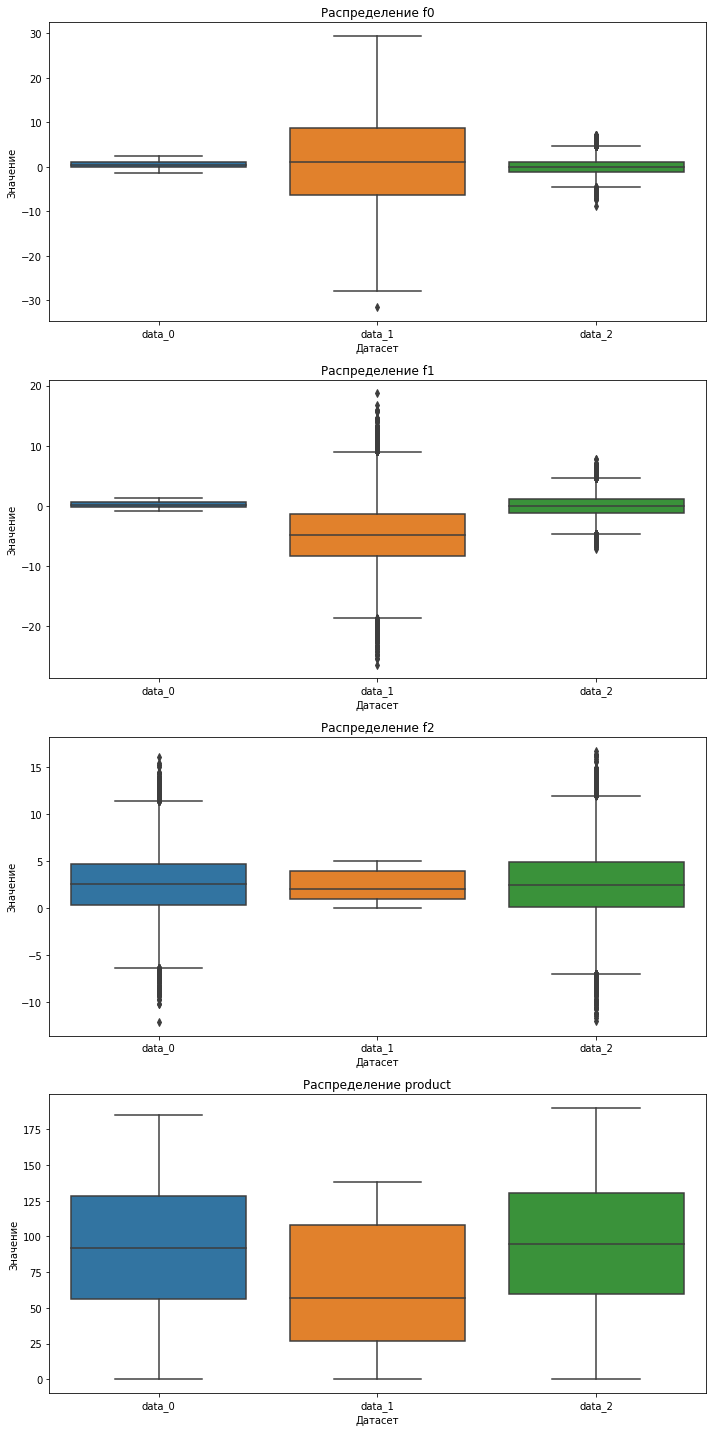

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_compare_boxplots(geo_data):
    df_list = []
    for name, df in geo_data.items():
        df_temp = df.copy()
        df_temp['dataset'] = name 
        df_list.append(df_temp)
    
    combined_df = pd.concat(df_list)
    
    #boxplot для каждого признака
    features = ['f0', 'f1', 'f2', 'product']
    
    plt.figure(figsize=(10, 20))
    for i, feature in enumerate(features, 1):
        plt.subplot(4, 1, i)
        sns.boxplot(data=combined_df, x='dataset', y=feature)
        plt.title(f'Распределение {feature}')
        plt.xlabel('Датасет')
        plt.ylabel('Значение')
    
    plt.tight_layout()
    plt.show()
plot_compare_boxplots(geo_data)

### Удаление выбросов 

#### data_0

In [9]:
def remove_outliers_iqr(data_0, column, threshold=1.5):
    """
    Удаляет выбросы по правилу: Q1 - threshold*IQR < данные < Q3 + threshold*IQR
    threshold=1.5 (стандартный) или 3 для более строгой фильтрации
    """
    q1 = data_0[column].quantile(0.25)
    q3 = data_0[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr
    
    return data_0[(data_0[column] >= lower_bound) & (data_0[column] <= upper_bound)]

In [10]:
data_0_clean = data_0.copy()
for col in ['f0', 'f1', 'f2', 'product']:
    data_0_clean = remove_outliers_iqr(data_0_clean, col, threshold=1.5)
data_0_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99494 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       99494 non-null  object 
 1   f0       99494 non-null  float64
 2   f1       99494 non-null  float64
 3   f2       99494 non-null  float64
 4   product  99494 non-null  float64
dtypes: float64(4), object(1)
memory usage: 4.6+ MB


#### data_1

Для data_1 наблюдаем выбросы для f_0, f_1, попробуем их удалить

In [11]:
def remove_outliers_iqr(data_1, column, threshold=1.5):
    """
    Удаляет выбросы по правилу: Q1 - threshold*IQR < данные < Q3 + threshold*IQR
    threshold=1.5 (стандартный) или 3 для более строгой фильтрации
    """
    q1 = data_1[column].quantile(0.25)
    q3 = data_1[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr
    
    return data_1[(data_1[column] >= lower_bound) & (data_1[column] <= upper_bound)]

In [12]:
data_1_clean = data_1.copy()
for col in ['f0', 'f1', 'f2', 'product']:
    data_1_clean = remove_outliers_iqr(data_1_clean, col, threshold=1.5)
data_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99363 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       99363 non-null  object 
 1   f0       99363 non-null  float64
 2   f1       99363 non-null  float64
 3   f2       99363 non-null  float64
 4   product  99363 non-null  float64
dtypes: float64(4), object(1)
memory usage: 4.5+ MB


#### data_3

Для data_2 наблюдаем выбросы для f_0, f_1, f_2, попробуем их удалить

Удаление выбросов

In [13]:
def remove_outliers_iqr(data_2, column, threshold=1.5):
    """
    Удаляет выбросы по правилу: Q1 - threshold*IQR < данные < Q3 + threshold*IQR
    threshold=1.5 (стандартный) или 3 для более строгой фильтрации
    """
    q1 = data_2[column].quantile(0.25)
    q3 = data_2[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr
    
    return data_2[(data_2[column] >= lower_bound) & (data_2[column] <= upper_bound)]

In [14]:
data_2_clean = data_2.copy()
for col in ['f0', 'f1', 'f2', 'product']:
    data_2_clean = remove_outliers_iqr(data_2_clean, col, threshold=1.5)
data_2_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98003 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       98003 non-null  object 
 1   f0       98003 non-null  float64
 2   f1       98003 non-null  float64
 3   f2       98003 non-null  float64
 4   product  98003 non-null  float64
dtypes: float64(4), object(1)
memory usage: 4.5+ MB


На данном шаге мы избавились от выбросов из датафреймов, удалили все значения, которые не попадали в интервалы q1-q3.

## Обучение и проверка модели

Исследуем основные взаимосвязи между признаками

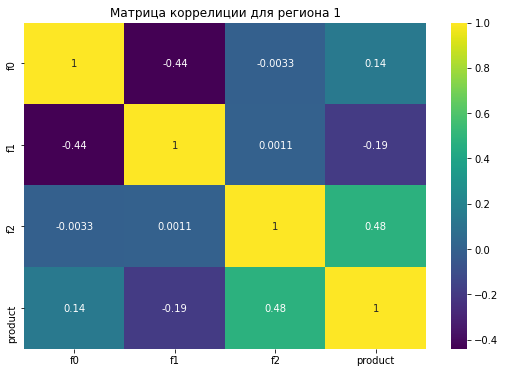

In [16]:
plt.figure(figsize=(9, 6))
sns.heatmap(data_0_clean.corr(), cmap="viridis", annot=True)
plt.title('Матрица коррелиции для региона 1')
plt.show()   

Видим умеренную зависимостьь между целевым показателем product и f2, мультиколлинеарности не наблюдается

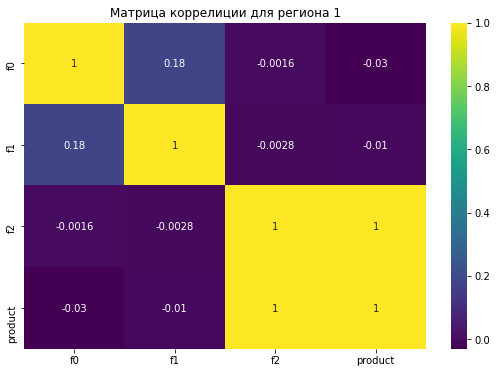

In [17]:
plt.figure(figsize=(9, 6))
sns.heatmap(data_1_clean.corr(), cmap="viridis", annot=True)
plt.title('Матрица коррелиции для региона 1')
plt.show()   

видим сильную зависимость между f2 и product, f 2 практикчески линейно определяет показатель product

In [18]:
print(data_1.corr())

               f0        f1        f2   product
f0       1.000000  0.182287 -0.001777 -0.030491
f1       0.182287  1.000000 -0.002595 -0.010155
f2      -0.001777 -0.002595  1.000000  0.999397
product -0.030491 -0.010155  0.999397  1.000000


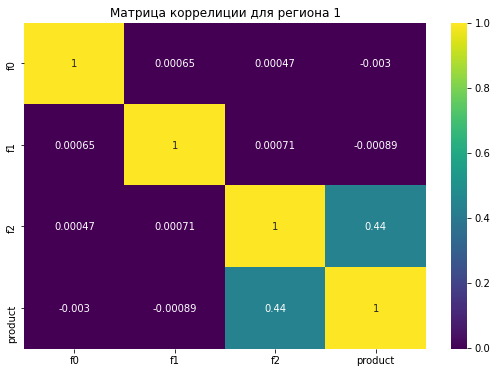

In [19]:
plt.figure(figsize=(9, 6))
sns.heatmap(data_2_clean.corr(), cmap="viridis", annot=True)
plt.title('Матрица коррелиции для региона 1')
plt.show()   

Разделим 3 датафрейма на тренировочную и тестовую, а также отделим потом целевой признак

In [20]:
# Примем значение аргумента random_state в переменной STATE
RANDOM_STATE = 12345

def split_scale_learn(df):

    # Делим данные на target и features
    data_y = df['product']
    data_x = df.drop(['id', 'product'], axis=1)
    # Делим данные на обучающую и валидационную выборки
    x_train, x_valid, y_train, y_valid = train_test_split(
        data_x,
        data_y,
        test_size=0.25,
        random_state=RANDOM_STATE)

    # Масштабируем признаки
    numeric = ['f0', 'f1', 'f2']

    scaler = StandardScaler()
    scaler.fit(x_train[numeric])

    pd.options.mode.chained_assignment = None

    x_train[numeric] = scaler.transform(x_train[numeric])
    x_valid[numeric] = scaler.transform(x_valid[numeric])

    # Обучаем модель
    model = LinearRegression()
    model.fit(x_train, y_train)
    predicted = model.predict(x_valid)
        # Оцениваем модель
    rmse = mean_squared_error(predicted, y_valid) ** .5

    return rmse, predicted, x_train, x_valid, y_valid

### Data_0

In [21]:
# Вызов функции и сохранение переменных для региона 1
rmse_0, predicted_0, x_0_train, x_0_valid, y_0_valid = split_scale_learn(data_0_clean)
print(f"Регион: data_0")
print(f'\tСр.значение предсказанного запаса сырья: {predicted_0.mean():.3f}')
print(f'\tСр.значение фактического запаса сырья: {data_0_clean["product"].mean():.3f}')
print(f'\tRMSE модели: {rmse_0:2f}')



Регион: data_0
	Ср.значение предсказанного запаса сырья: 92.725
	Ср.значение фактического запаса сырья: 92.501
	RMSE модели: 37.922931


### Data_1

In [22]:
# Вызов функции и сохранение переменных для региона 1
print(f"Регион: data_1")
rmse_1, predicted_1, x_1_train, x_1_valid, y_1_valid = split_scale_learn(data_1_clean)
print(f'\tСр.значение предсказанного запаса сырья: {predicted_1.mean():.3f}')
print(f'\tСр.значение фактического запаса сырья: {data_1_clean["product"].mean():.3f}')
print(f'\tRMSE модели: {rmse_1:2f}')



Регион: data_1
	Ср.значение предсказанного запаса сырья: 68.572
	Ср.значение фактического запаса сырья: 68.809
	RMSE модели: 0.889031


### Data_2

In [23]:
# Вызов функции и сохранение переменных для региона 1
rmse_2, predicted_2, x_2_train, x_2_valid, y_2_valid = split_scale_learn(data_2_clean)
print(f"Регион: data_2")
print(f'\tСр.значение предсказанного запаса сырья: {predicted_2.mean():.3f}')
print(f'\tСр.значение фактического запаса сырья: {data_2_clean["product"].mean():.3f}')
print(f'\tRMSE модели: {rmse_2:2f}')



Регион: data_2
	Ср.значение предсказанного запаса сырья: 94.677
	Ср.значение фактического запаса сырья: 94.785
	RMSE модели: 40.176797


### Промежуточные выводы

- data_0 и data_2:

Средние значения предсказанного и фактического запасов близки.
Однако высокий RMSE (37.92 и 40.18) указывает на большую ошибку в отдельных прогнозах — модель плохо предсказывает крайние значения.

Возможные причины: шум в данных, недостаток признаков 

- data_1:

Средние значения почти идентичны, а RMSE крайне низкий (0.89) — модель работает почти идеально.
Такая точность может сигнализировать о "подгонке" под данные (риск переобучения) или простой зависимости (например, линейной).По-хорошему, нет ли утечки данных (например, признак косвенно содержит целевую переменную).


## Подготовка к расчёту прибыли

Условия задачи:

- При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.

- Бюджет на разработку скважин в регионе — 10 млрд рублей.

- При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.

- После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.

In [24]:
budget = 10000000000  # Бюджет (10 млрд руб.)
n_points = 500           # Исследуемые точки
n_best = 200             # Лучшие точки для разработки
income_per_barrel = 450  # Доход с барреля (руб.)
ths_barrel=450000

In [25]:
# Сколько баррелей надо добывать, объем безубыточности
well_cost=budget/(n_best*ths_barrel)
print(f"Минимальный объём на скважину для безубыточности: {well_cost:.1f} тыс. баррелей")

Минимальный объём на скважину для безубыточности: 111.1 тыс. баррелей


### Промежуточный вывод

Средние запасы всех рассматриваемых регионов ниже расчетного безубыточного объема.
Однако для региона 0 и региона 2 расчетные средние значения близки к рассчитанному объему для достижения безубыточности.
- data_0 и data_2 потенциально прибыльны. Потому что далее для расчетов мы будем использовать топ-200 точек, из прибыльночть может быть выше средней.

## Расчёт прибыли и рисков 

### Функция для расчета прибыли

In [26]:
def calculate_profit(predictions, target, income_per_unit=ths_barrel):
    """Расчёт прибыли для выбранных скважин и вероятности убытков"""
    # Сортируем предсказания по убыванию и берём индексы топ-n_best
    top_indices = np.argsort(predictions)[-n_best:][::-1]
    
    # Суммируем фактические запасы в этих скважинах
    total_product = target.iloc[top_indices].sum()
    
    # Рассчитываем прибыль
    revenue = total_product * income_per_unit
    profit = revenue - budget
    
    # Рассчитываем вероятность убытков (если profit < 0)
    risk_loss = 1 if profit < 0 else 0
    
    return profit, risk_loss

### Bootstrap-анализ прибыли и функция для расчета целевых показателей

Анализ для каждого региона

In [27]:
def calculate_profit_and_loss(predictions, target, n_best=200, budget=10_000_000_000, income_per_unit=450_000):
    # Получаем индексы топ-N скважин
    top_indices = np.argsort(predictions)[-n_best:][::-1]
    
    # Рассчитываем показатели для каждой скважины
    products = target.iloc[top_indices]
    revenues = products * income_per_unit
    costs = budget / n_best  
    
    # Прибыль/убыток по каждой скважине
    profit_per_well = revenues - costs
    loss_per_well = np.where(profit_per_well < 0, abs(profit_per_well), 0)
    
    # Суммарные показатели
    total_profit = profit_per_well.sum()
    total_loss = loss_per_well.sum()
    loss_percentage =  (profit_per_well < 0).mean() * 100
    
    return {
        'total_profit': total_profit,
        'total_loss': total_loss,
        'loss_percentage': loss_percentage,
        'profit_per_well': profit_per_well,
        'loss_per_well': loss_per_well
    }

def bootstrap_profit_loss(predictions, target, n_iterations=1000):
    """Bootstrap-анализ прибыли и убытков"""
    results = {
        'profits': [],
        'losses': [],
        'loss_percentages': []
    }
    
    n_samples = len(predictions)
    
    for _ in range(n_iterations):
        # Генерируем bootstrap-выборку
        indices = np.random.choice(n_samples, size=n_samples, replace=True)
        sample_pred = predictions[indices]
        sample_true = target.iloc[indices]
        
        # Рассчитываем показатели
        calc = calculate_profit_and_loss(sample_pred, sample_true)
        results['profits'].append(calc['total_profit'])
        results['losses'].append(calc['total_loss'])
        results['loss_percentages'].append(calc['loss_percentage'])
    
    # Конвертируем в массивы
    for key in results:
        results[key] = np.array(results[key])
    
    return results

# Анализ для каждого региона
regions = {
    'region_0': (predicted_0, y_0_valid),
    'region_1': (predicted_1, y_1_valid), 
    'region_2': (predicted_2, y_2_valid)
}

final_results = {}

for name, (pred, target) in regions.items():
    bs_results = bootstrap_profit_loss(pred, target)
    
    # Агрегируем статистику
    stats = {
        'mean_profit': bs_results['profits'].mean(),
        'mean_loss': bs_results['losses'].mean(),
        'loss_probability': (bs_results['losses'].mean())/(bs_results['profits'].mean()) * 100,
        'profit_ci': np.percentile(bs_results['profits'], [2.5, 97.5]),
        'loss_ci': np.percentile(bs_results['losses'], [2.5, 97.5])
    }
    
    final_results[name] = stats
    
    # Выводим результаты
    print(f"\n{'='*40}")
    print(f"Регион: {name.upper()}")
    print(f"{'='*40}")
    print(f"Средняя прибыль: {stats['mean_profit']/1e9:.2f} млрд руб")
    print(f"Средний убыток: {stats['mean_loss']/1e9:.2f} млрд руб")
    print(f"Вероятность убыточности региона: {stats['loss_probability']:.1f}%")
    print(f"95% Доверительный интервал: [{stats['profit_ci'][0]/1e9:.2f}, {stats['profit_ci'][1]/1e9:.2f}] млрд руб")

# Выбор лучшего региона
profitable_regions = {k: v for k, v in final_results.items() if v['loss_probability'] < 2.5}

if profitable_regions:
    best_region = max(profitable_regions.items(), key=lambda x: x[1]['mean_profit'])
    print(f"\nОптимальный регион для разработки: {best_region[0]}")
    print(f"Ожидаемая прибыль: {best_region[1]['mean_profit']/1e9:.2f} млрд руб")
else:
    print("\nНет регионов, удовлетворяющих критериям")


Регион: REGION_0
Средняя прибыль: 3.33 млрд руб
Средний убыток: 0.22 млрд руб
Вероятность убыточности региона: 6.5%
95% Доверительный интервал: [2.95, 3.71] млрд руб

Регион: REGION_1
Средняя прибыль: 2.42 млрд руб
Средний убыток: 0.00 млрд руб
Вероятность убыточности региона: 0.0%
95% Доверительный интервал: [2.42, 2.42] млрд руб

Регион: REGION_2
Средняя прибыль: 2.43 млрд руб
Средний убыток: 0.28 млрд руб
Вероятность убыточности региона: 11.5%
95% Доверительный интервал: [2.08, 2.77] млрд руб

Оптимальный регион для разработки: region_1
Ожидаемая прибыль: 2.42 млрд руб


## Вывод

В рамках данного проекта по выбору оптимального места локации скважины, мы выполнили несколько этапов:
- изучили данные о трех регионах
- провели предобработку данных, удалили выбросы
- обучили и проверили модель для каждого региона
- провели подготовку к расчету прибыли,ввели все необходимые значения в качестве переменных. Выявили достаточный объём сырья для безубыточной разработки новой скважины - 111.1 тыс.баррелей.
- посчитали прибыль и риски для каждого региона, применив bootstrap.

Предлагаемым регионом для локации скважины предложен **region_1**, это безопасный и стаблиный вариант с ожидаемой прибылью 2.42 млрд.руб, это позволит минимизировать финансовые риски.